# Part I - (Ford gobike Trip Data)
## by (Fatiat Temitope Hammed)

## Introduction
> The dataset entails information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data covers bike ride during the month of february 20


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load in dataset
tripdata = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(tripdata.shape)
print(tripdata.dtypes)
print(tripdata.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
#we drop null values and columns not necessary
df = tripdata.dropna()
df = df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude',  'end_station_longitude'], axis=1)

In [5]:
# we derive column 'age' from birth year
df['age'] = 2019 - df['member_birth_year']

In [6]:
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,136.604486,4482.587555,1984.803135,34.196865
std,1642.204905,111.648819,111.335635,1659.195937,10.118731,10.118731
min,61.000000,3.000000,3.000000,11.000000,1878.000000,18.000000
25%,323.000000,47.000000,44.000000,3799.000000,1980.000000,27.000000
50%,510.000000,104.000000,101.000000,4960.000000,1987.000000,32.000000
75%,789.000000,239.000000,238.000000,5505.000000,1992.000000,39.000000
max,84548.000000,398.000000,398.000000,6645.000000,2001.000000,141.000000


In [7]:
#we drop some rows with duration above 50000 seconds
df.drop(df[df['duration_sec'] >= 50000].index, inplace = True)

In [8]:
#we drop rows where the gender is not specified
df.drop(df[df['member_gender'] == 'Other'].index, inplace = True)

In [9]:
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age
count,171249.000000,171249.000000,171249.000000,171249.000000,171249.000000,171249.000000
mean,677.067633,138.716477,136.302857,4481.344148,1984.838907,34.161093
std,1072.883529,111.719567,111.419799,1659.511370,10.116461,10.116461
min,61.000000,3.000000,3.000000,11.000000,1878.000000,18.000000
25%,322.000000,47.000000,44.000000,3796.000000,1980.000000,27.000000
50%,509.000000,104.000000,100.000000,4960.000000,1987.000000,32.000000
75%,786.000000,239.000000,237.000000,5505.000000,1992.000000,39.000000
max,49816.000000,398.000000,398.000000,6645.000000,2001.000000,141.000000


In [10]:
# convert the timestamp column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# extract hour from the timestamp column to create an time_hour column
df['start_hour'] = df['start_time'].dt.hour

In [11]:
#we split the day hour into various time of the day
df['start_period'] = (df['start_time'].dt.hour % 24 + 4) // 4
df['start_period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)


In [12]:
#we create column for the dayof the week 
df['day'] = pd.to_datetime(df['start_time']).dt.day_name()

In [13]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour,start_period,day
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45.0,23,Night,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60.0,23,Night,Thursday
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,36.0,23,Night,Thursday
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,30.0,23,Night,Thursday
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,No,27.0,23,Night,Thursday


In [14]:
df.shape

(171249, 16)

### Structure of the dataset?

> There are 183,412 trip record in the dataset with 16 attributes (duration_sec, start_time, end_time, start_station_id,
start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude,  end_station_longitude, bike_id, user_type, member_birth_year, member_gender and bike_share_for_all_trip). Most variables are numeric in nature except for the station names, user type and bike share for trip which should be in boolean.

### Main feature(s) of interest in the dataset?

> I'm most interested in figuring out what features determines the decision of a bike user to share trip ride in the dataset.

### Features in the dataset I think will help support investigation into the feature(s) of interest?

> I expect that the duration of the trip will have a strong effect on ride share. The longer the trip duration, the more likely a bike user will share ride. I also think that the time and day of the week, the user type (subscriber or customer), the riders age and gender will have effect on the decision to share bike ride.


## Univariate Exploration 


#### That is the Average Trip Duration?
We start with Average trip duration

In [15]:
def x_y_t (xl, yl, title):
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(title)

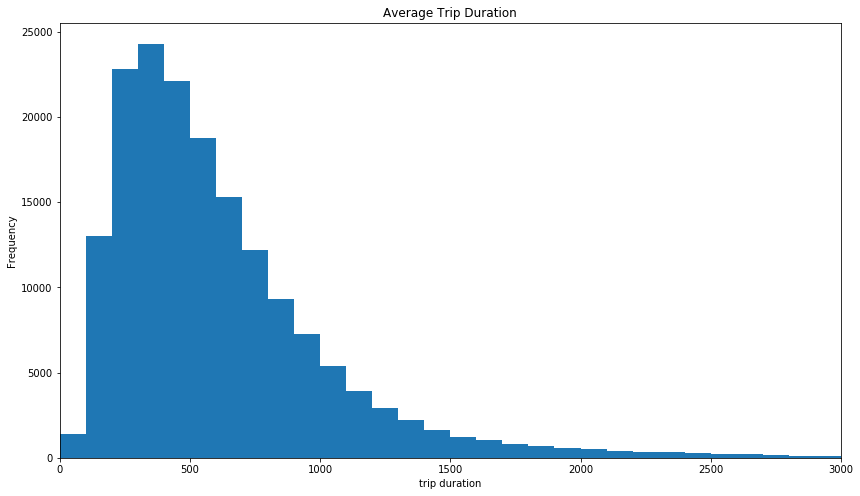

In [16]:
binsize = 100
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[14, 8])
plt.xlim(0,3000)
plt.hist(data = df, x = 'duration_sec', bins = bins)
x_y_t ('trip duration', 'Frequency', 'Average Trip Duration')
plt.show()

The trip duration has a long tail distribution. For easier visualization, we convert the duration from seconds to minutes and also plot on the log scale. 

In [17]:
df['duration_min'] = df['duration_sec'] / 60

In [18]:
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,age,start_hour,duration_min
count,171249.000000,171249.000000,171249.000000,171249.000000,171249.000000,171249.000000,171249.000000,171249.000000
mean,677.067633,138.716477,136.302857,4481.344148,1984.838907,34.161093,13.450613,11.284461
std,1072.883529,111.719567,111.419799,1659.511370,10.116461,10.116461,4.733802,17.881392
min,61.000000,3.000000,3.000000,11.000000,1878.000000,18.000000,0.000000,1.016667
25%,322.000000,47.000000,44.000000,3796.000000,1980.000000,27.000000,9.000000,5.366667
50%,509.000000,104.000000,100.000000,4960.000000,1987.000000,32.000000,14.000000,8.483333
75%,786.000000,239.000000,237.000000,5505.000000,1992.000000,39.000000,17.000000,13.100000
max,49816.000000,398.000000,398.000000,6645.000000,2001.000000,141.000000,23.000000,830.266667


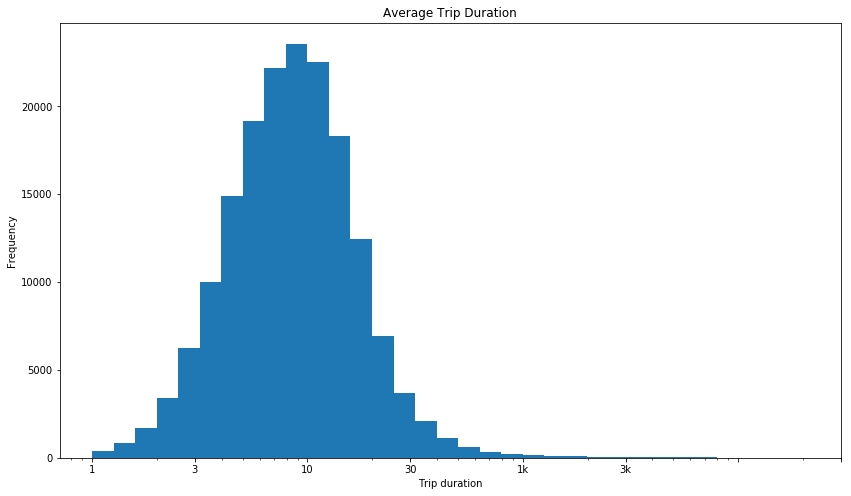

In [19]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[14, 8])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1 , 3, 10, 30, 100, 300, 1e3, 3e3], ['1', '3', '10', '30', '1k', '3k'])
x_y_t ('Trip duration', 'Frequency', 'Average Trip Duration')
plt.show()

From this visual, the trip duration peak is within between 8 to 10 minutes. This can be interpreted that most riders uses the bike for short period as 10 minutes.

#### What is the average Age of Individuals that takes the trip?
We Check the distribution of Riders Age

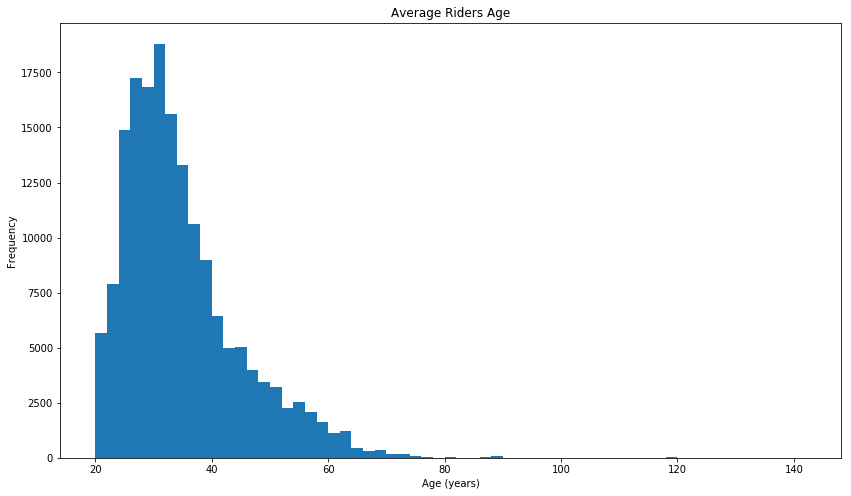

In [20]:
binsize = 2
bins = np.arange(20, df['age'].max()+binsize, binsize)
plt.figure(figsize=[14, 8])
plt.hist(data = df, x = 'age', bins = bins)
x_y_t ('Age (years)', 'Frequency', 'Average Riders Age')
plt.show()

The age distribution looks bimodal with a peak at 25years and another at about 35 years then the slope gradually steeps downward. This states that most riders are youths and the older they get the lesser they ride.

#### What is the distibution of Individuals by Gender, User type and Bike Share? 

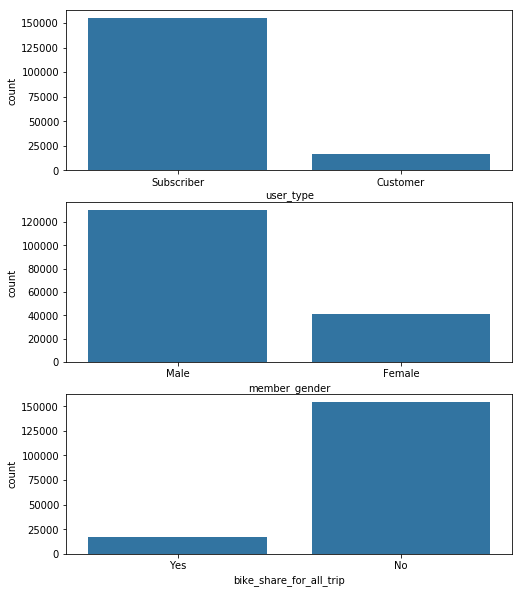

In [21]:
fig, ax = plt.subplots(nrows=3, figsize = [8, 10])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = default_color, ax = ax[1])
sb.countplot(data = df, x = 'bike_share_for_all_trip', color = default_color, ax = ax[2])


From the distribution of the categorical data, we can observe that there high population of subscriber compared to customers, more male riders than female and very low population of trip ride shared.

#### What days Do Most Trips Happens? 

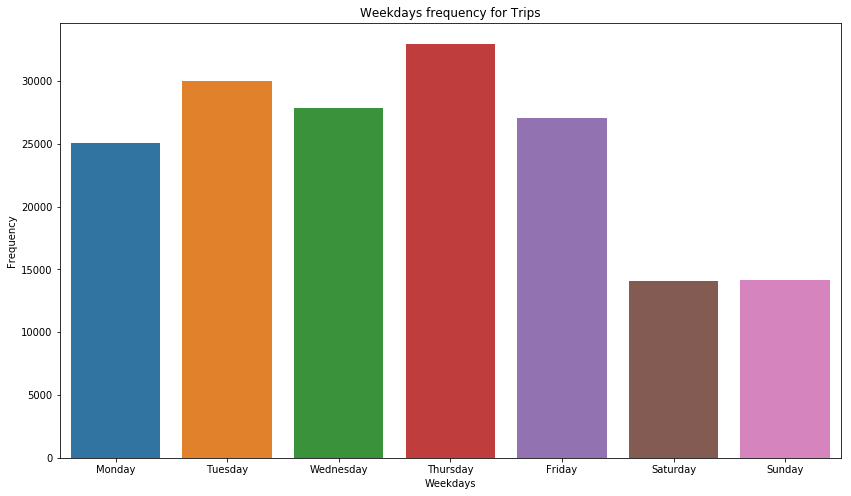

In [22]:
plt.figure(figsize=[14, 8])
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sb.countplot(x = "day", data = df, order = day_order)
x_y_t ('Weekdays', 'Frequency', 'Weekdays frequency for Trips')

Most bike rides start in the evening and morning as compared to other periods in the day. Most frequent days of rides are Thursdays and Tuesdays with weekends having the lowest frequency.

####  What Period of the Day has The highest trip rides? 

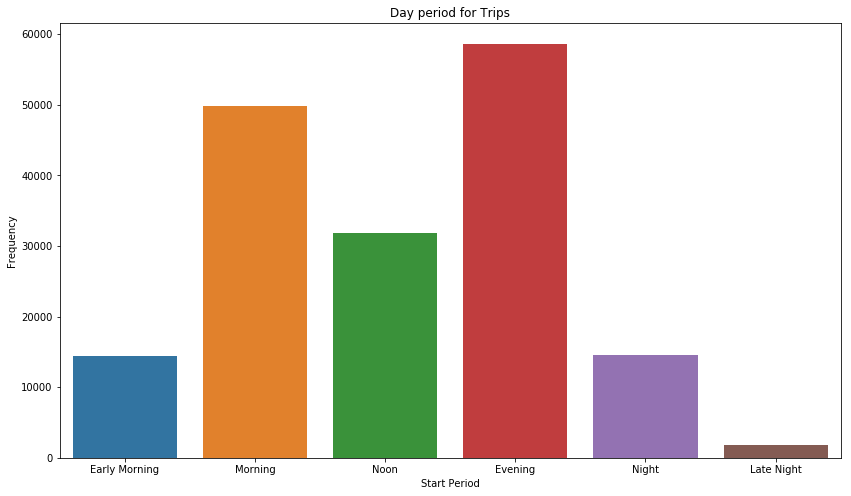

In [23]:
plt.figure(figsize=[14, 8])
day_order = ["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"]
sb.countplot(x = "start_period", data = df, order = day_order)
x_y_t ('Start Period', 'Frequency', 'Day period for Trips')

Most bike rides start in the evening and morning as compared to other periods in the day.These peak periods are expected as they are work hours 

In [24]:
df.start_station_id.nunique()

329

We try to check the start station id and end station id. These ids are within the range of 0 to 400. We thereby group the stations into 8, each group with an average of 50 bike stattions. This is done with the aim that each station are numbered in respect to their proximity. We will attempt to check distribution of trips in these stations using the groups. 

In [25]:
df["start_station_id_bins"] = pd.cut(
    x=df["start_station_id"],
    bins=[1, 50, 100, 150, 200, 250, 300, 350, np.inf],
    labels=["GroupA", "GroupB", "GroupC", "GroupD", "GroupE", "GroupF", "GroupG", "GroupH"],
)


df["end_station_id_bins"] = pd.cut(
    x=df["end_station_id"],
    bins=[1, 50, 100, 150, 200, 250, 300, 350, np.inf],
    labels=["GroupA", "GroupB", "GroupC", "GroupD", "GroupE", "GroupF", "GroupG", "GroupH"],
)

#### What Stations has the highest trips?

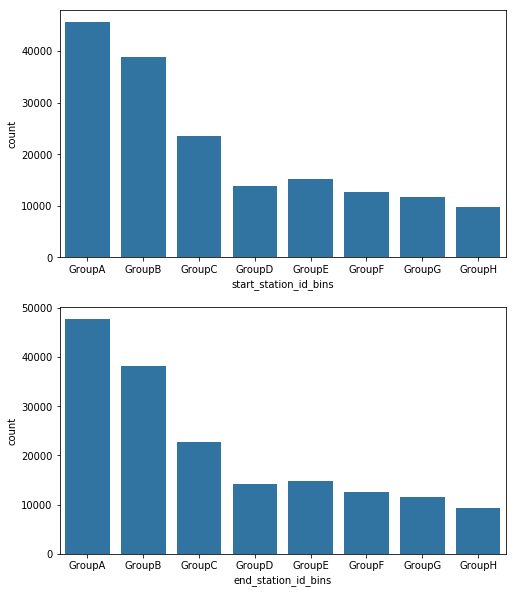

In [26]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_station_id_bins', color = default_color, ax = ax[0])
sb.countplot(data = df, x = 'end_station_id_bins', color = default_color, ax = ax[1])

Most of the trips start stations are within the stations in group A with station id within (1 to 50).This is also the same with end stations followed by Group B and Group C. We can say most rides are whithin the stations in these 3 groups.

In [27]:
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour,start_period,day,duration_min,start_station_id_bins,end_station_id_bins
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,45.0,23,Night,Thursday,26.416667,GroupA,GroupE
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,60.0,23,Night,Thursday,29.883333,GroupB,GroupG
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,36.0,23,Night,Thursday,19.116667,GroupF,GroupG
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,30.0,23,Night,Thursday,26.916667,GroupA,GroupC
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,121.0,Mission Playground,6488,Subscriber,1992.0,Male,No,27.0,23,Night,Thursday,17.483333,GroupA,GroupC


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Due to the long tail distribution of the trip duration values, I converted the units from seconds to minutes and visualise using log transformation. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During observations, some outlier points were noticed and dropped from the data such as null values, gender rows not specified, trip duration above 50000 seconds which is above 12 hrs of ride.

## Bivariate Exploration

#### What is the relationship between trip duration and riders age? 
We check the relationship between the trip duration and riders age as the two numeric values in the data

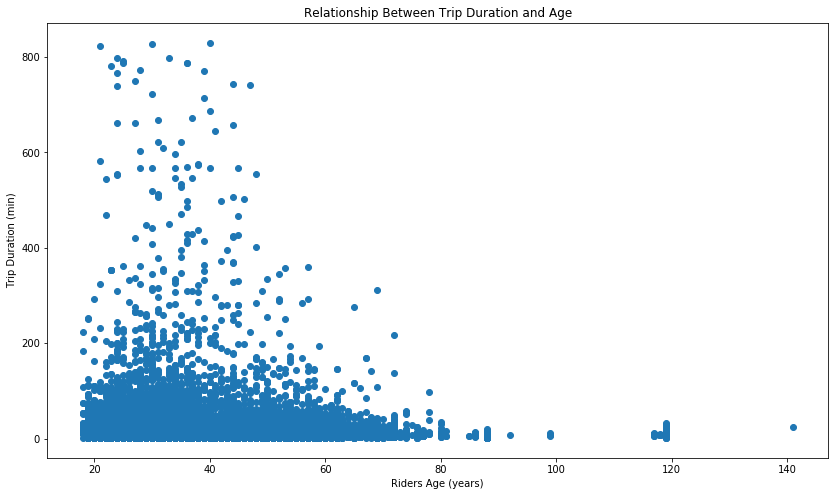

In [28]:
plt.figure(figsize=[14, 8])
plt.scatter(data = df, x = 'age', y = 'duration_min');
x_y_t ('Riders Age (years)', 'Trip Duration (min)', 'Relationship Between Trip Duration and Age')

In [29]:
# compute the logarithm of duration_min to make multivariate plotting easier

def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
df['log_duration'] = df['duration_min'].apply(log_trans)

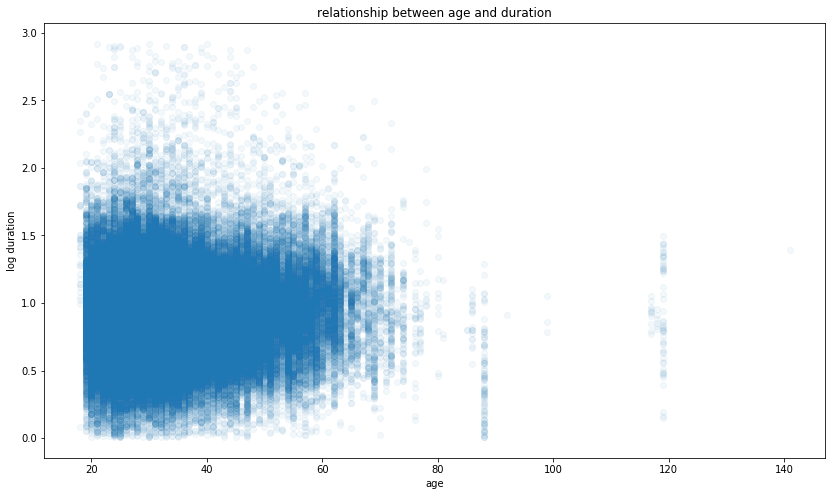

In [30]:
#we plot with log scale and transparency
plt.figure(figsize = [14, 8])
plt.scatter(data = df, x = 'age', y = 'log_duration', alpha = 0.05)
x_y_t('age', 'log duration', 'relationship between age and duration')

From the observation,there is no strong correlation between the two numeric values in the data which is the trip duration and the individualriders age

In [31]:
numeric_vars = ['duration_min', 'age', ]
categoric_vars = ['member_gender', 'user_type', 'bike_share_for_all_trip', 'start_period', 'day']

From the observation,there is no strong correlation between the two numeric values in the data which is the trip duration and the individualriders age. 


We move on to check how the trip duration  and age correlate with the categorical variables

#### What is the relationship between Riders Age and Bike sharing 

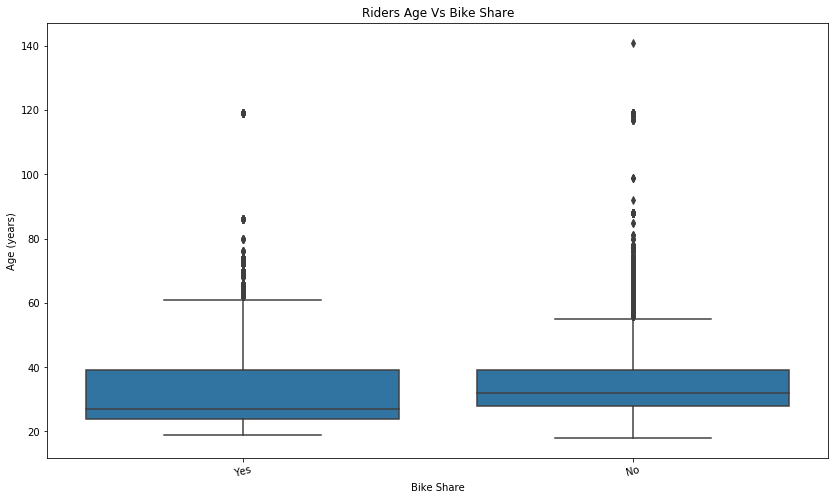

In [32]:
plt.figure(figsize=[14, 8])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'bike_share_for_all_trip', y = 'age',
              color = base_color)
plt.xticks(rotation = 15)
x_y_t ('Bike Share', 'Age (years)', 'Riders Age Vs Bike Share')

The average age of those who share bike ride is lower than average age of those who do not. We can say riders above the age of 35yrs do not share bike ride as to younger individuals. We can say young riders (youths) share their bike trips than older riders 

#### What is the relationship between trip duration, Age and other categorical values

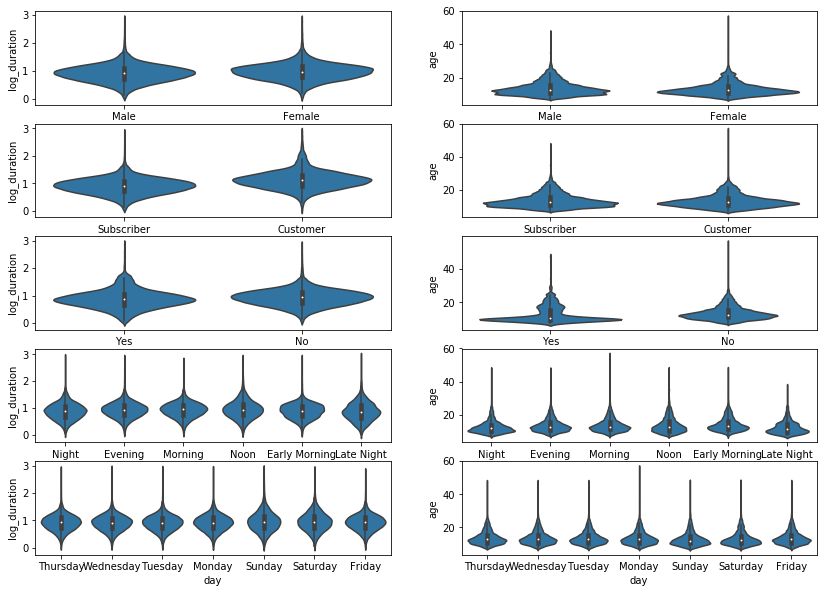

In [33]:
fig, ax = plt.subplots(ncols = 2, nrows = 5, figsize = [14,10])
age_ticks = [0, 20, 40, 60, 80, 100]

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x = var, y = 'log_duration', ax = ax[i,0],
               color = default_color)
    
    sb.violinplot(data = df, x = var, y = 'age', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticklabels(age_ticks)
    

The plot of the full data using violin plots and log scale for the trip duration reveals more than the box plot earlier especially wth regards to trip duration plots. While the average trip duration is 10 minutes rides most of the categorical data, the average age is below 20 years, 

For now, we check the relationship between the categorical variables. Here we focus on the relationship between other categorical variables and bike share for trips.

#### What is the frequency of Gender with respect to trip share? 

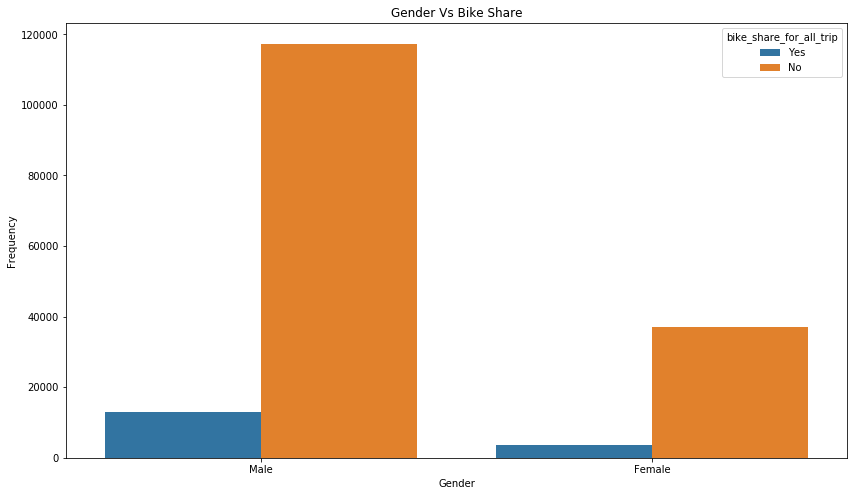

In [34]:
plt.figure(figsize=[14, 8])
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip')
x_y_t ('Gender', 'Frequency', 'Gender Vs Bike Share')

#### What is the population Individuals User type with respect to trip share? 

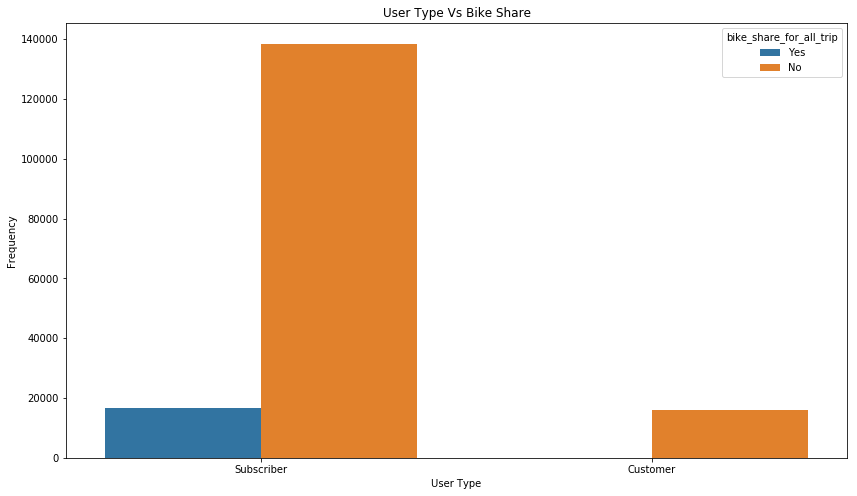

In [35]:
plt.figure(figsize=[14, 8])
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip')
x_y_t ('User Type', 'Frequency', 'User Type Vs Bike Share')

Surprisingly, from this, we can observe that even though the numbers of individuals that share ride among the subscribers are low, customers do not share their bike trip at all.

#### On what days of the week are trips most shared? 

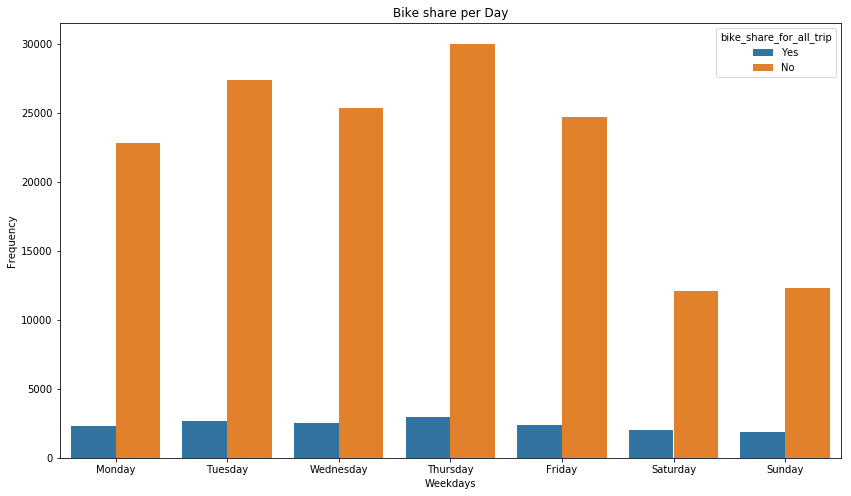

In [36]:
plt.figure(figsize=[14, 8])
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sb.countplot(data = df, x = 'day', order= day_order, hue = 'bike_share_for_all_trip')
x_y_t ('Weekdays', 'Frequency', 'Bike share per Day')

It is observed that even though weekends have the lowest frquency of trips, the frequency of individuals who share their ride during weekends are quiet noticeable.

#### On what period of the day are Trips Shared the most? 

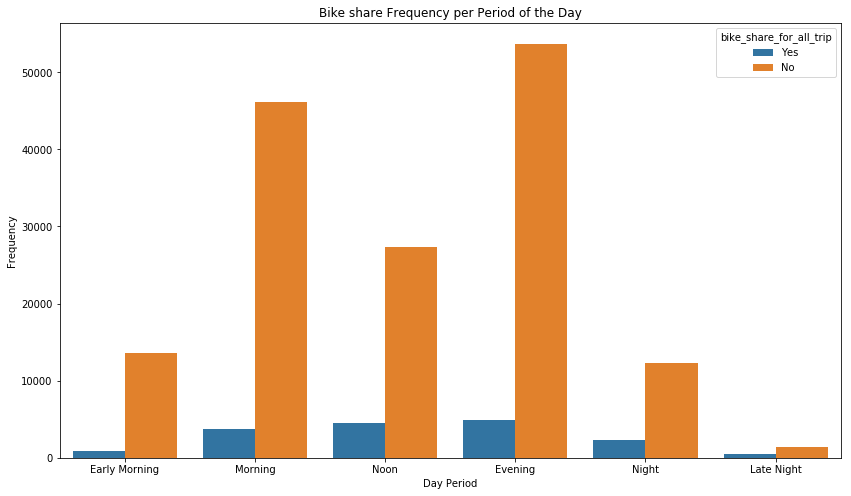

In [37]:
plt.figure(figsize=[14, 8])
day_order = ["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"]
sb.countplot(data = df, x = 'start_period', order = day_order, hue = 'bike_share_for_all_trip')
x_y_t ('Day Period', 'Frequency', 'Bike share Frequency per Period of the Day')

The most frequent period of ride is Evening and Morning. But compared to other periods it is observed that individuals who share bike most take off in the Evening and Noon compared to other periods of the day.

#### Which station groups share rides the most? 

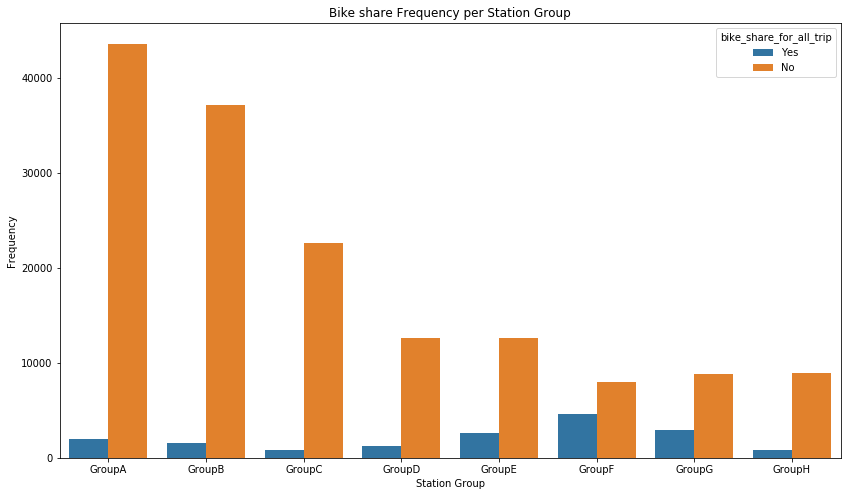

In [38]:
plt.figure(figsize=[14, 8])
sb.countplot(data = df, x = 'start_station_id_bins', hue = 'bike_share_for_all_trip')
x_y_t ('Station Group', 'Frequency', 'Bike share Frequency per Station Group')

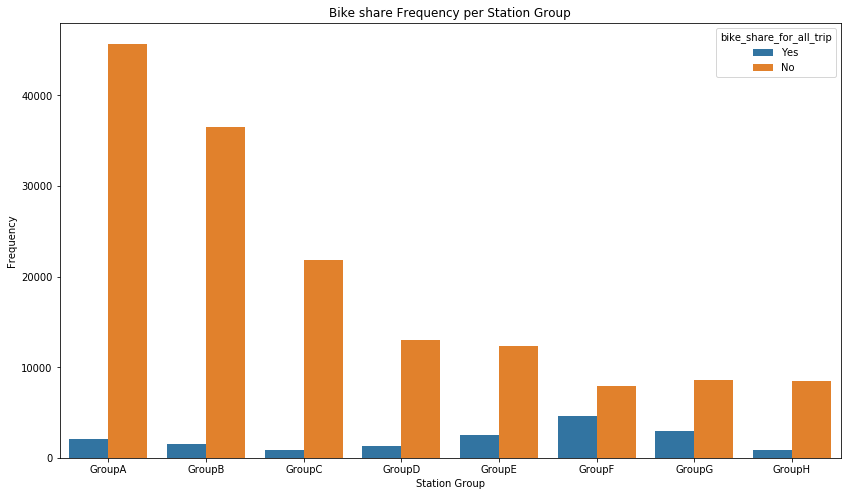

In [39]:
plt.figure(figsize=[14, 8])
sb.countplot(data = df, x = 'end_station_id_bins', hue = 'bike_share_for_all_trip')
x_y_t ('Station Group', 'Frequency', 'Bike share Frequency per Station Group')

While the most frequent trip take off and end stations are stations within Group A, it is expected that it will also have the most bike share trips but surprisingly stations wihing Group F and Group G has more trips where bike were shared.

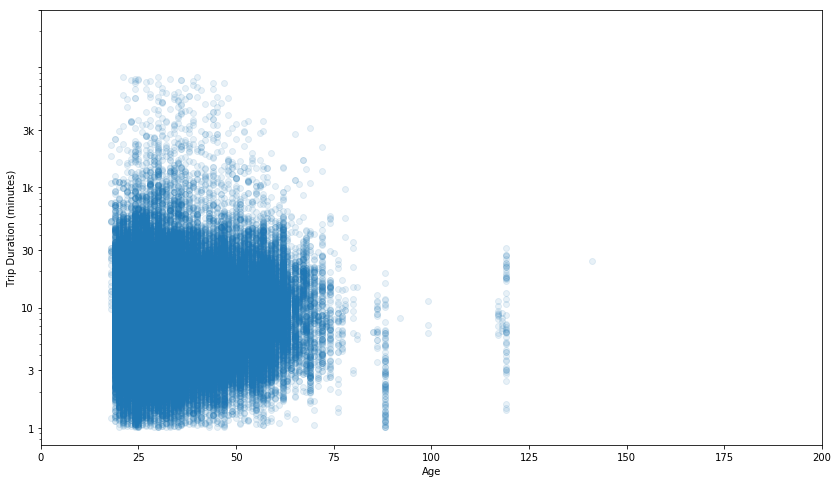

In [40]:
plt.figure(figsize = [14, 8])
plt.scatter(data = df, x = 'age', y = 'duration_min', alpha = 1/10)
plt.xlim([0, 200])
plt.xlabel('Age')
plt.yscale('log')
plt.yticks([1 , 3, 10, 30, 100, 300, 1e3, 3e3], ['1', '3', '10', '30', '1k', '3k'])
plt.ylabel('Trip Duration (minutes)')
plt.show ()

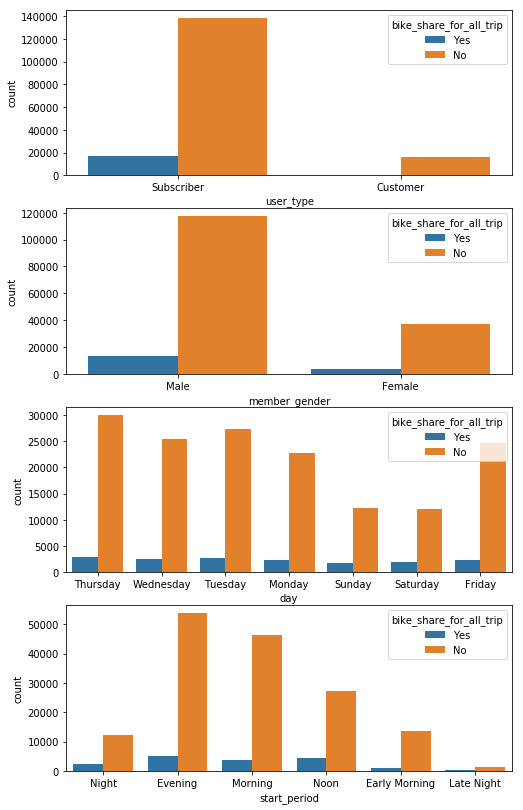

In [41]:
fig, ax = plt.subplots(nrows=4, figsize = [8,14])

default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip', ax = ax[0])
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip', ax = ax[1])
sb.countplot(data = df, x = 'day', hue = 'bike_share_for_all_trip', ax = ax[2])
sb.countplot(data = df, x = 'start_period', hue = 'bike_share_for_all_trip', ax = ax[3])



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Surprisingly,even using the log value for trip duration,we did not observe any strong correllation between the trips duration and individual age. There are some interesting observation in relationship between the individuals age and categorical variables. The average age of those who share bike ride is lower than average age of those who do not. We can say riders above the age of 35yrs do not share bike ride as to younger individuals.
From the violin plots, we can observe that the trips taken within station H have higher trip duration compared to other station group. But individual that takes trip within stations in groupF tends to share their bike rides compared other groups. More investigation will be carried out on the bike share for trips and these station groups.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From the categorical data, we observe that more subscribers share their bike ride than customers. Ride share frequency in the evening and afternoon tends to be higher than other time of the day. With regards to the day of the week, less ride trips are taken on weekends compared to weekdays and thereby also expected that less ride share will take placeon these days.

## Multivariate Exploration


Text(0.5,1,'Riders Age per Trip Duration & Day Period')

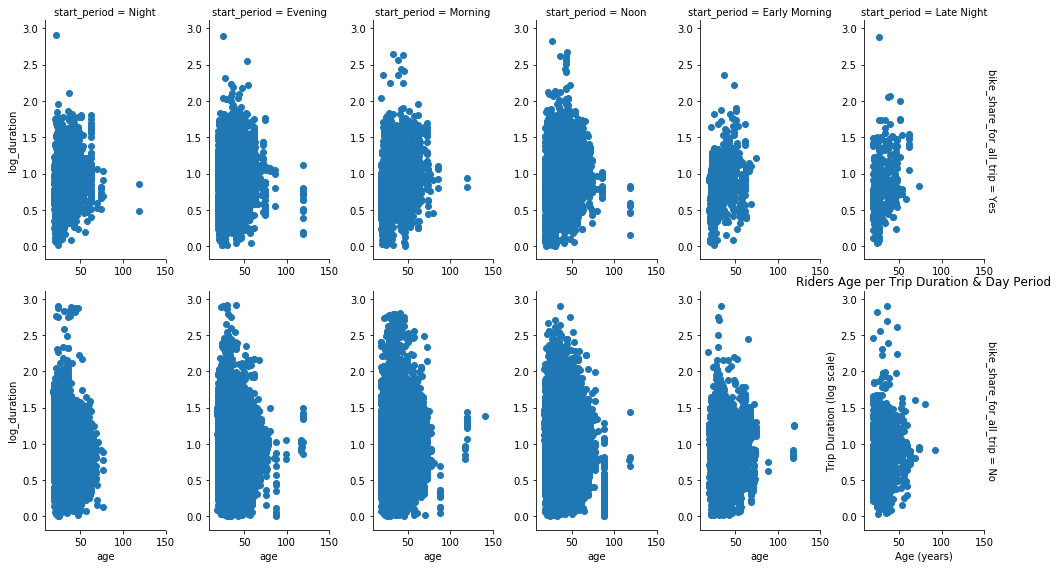

In [42]:
g = sb.FacetGrid(data = df, col = 'start_period', row = 'bike_share_for_all_trip', size = 2.5,
                margin_titles = True)
g.fig.set_size_inches(14, 8)
g.map(plt.scatter, 'age', 'log_duration')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (log scale)')
plt.title('Riders Age per Trip Duration & Day Period')

It is observed that most trips are within 10 to 20 minutes duration, but in the Morning and Noon, we observed the concentration of distance more than 20 minutes duration and also the intensity of those who share their trip ride in he Noon time. 

Text(0.5,1,'Riders age per Trip Duration & Weekday')

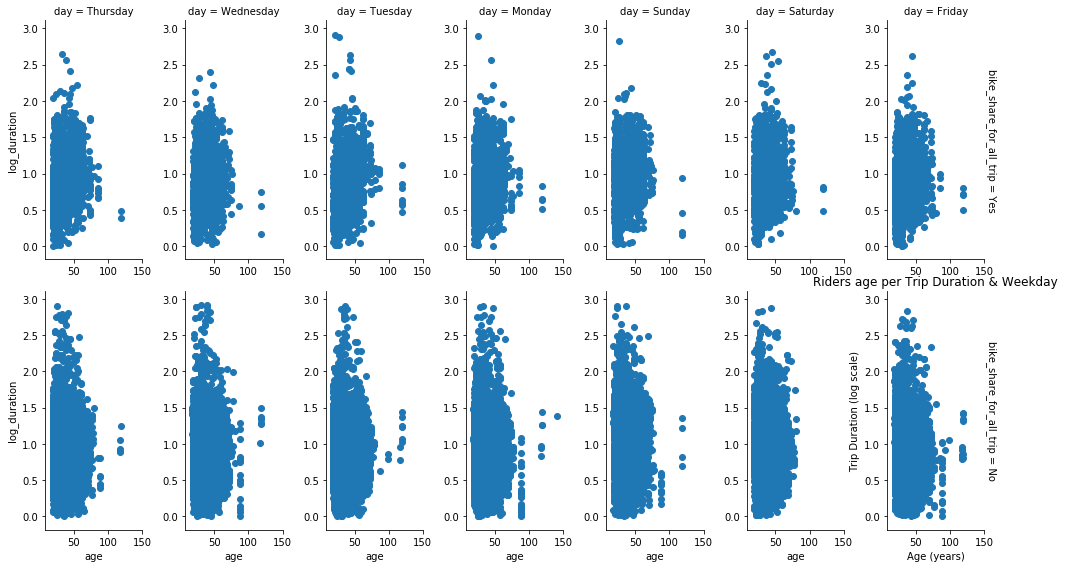

In [43]:
g = sb.FacetGrid(data = df, col = 'day', row = 'bike_share_for_all_trip', size = 2.5,
                margin_titles = True)
g.fig.set_size_inches(14, 8)
g.map(plt.scatter, 'age', 'log_duration')
plt.xlabel('Age (years)')
plt.ylabel('Trip Duration (log scale)')
plt.title('Riders age per Trip Duration & Weekday')

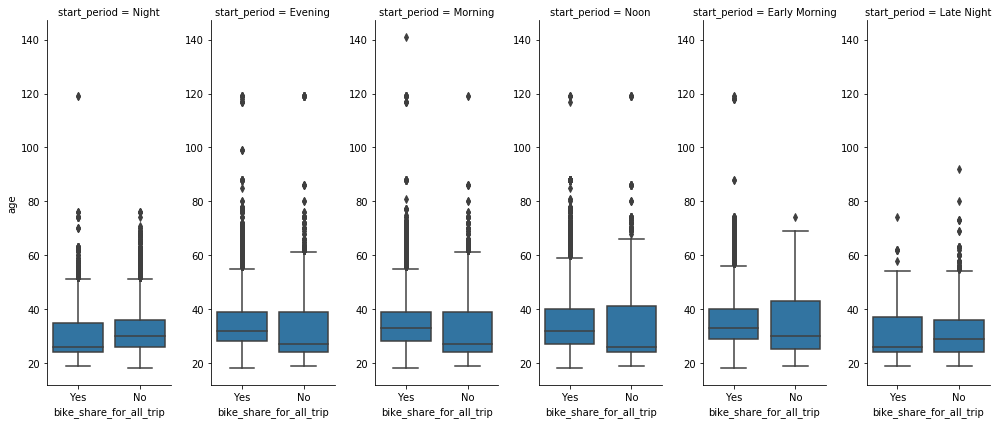

In [44]:
g = sb.FacetGrid(data = df, col = 'start_period', size = 8)
g.fig.set_size_inches(14, 6)
g.map(sb.boxplot, 'bike_share_for_all_trip', 'age')

It is deduced that while those who share trip ride in the Morning, Noon and Evening Period (day time) are within the average age of 35 years, most who share trip ride are younger within the age 25 years. 

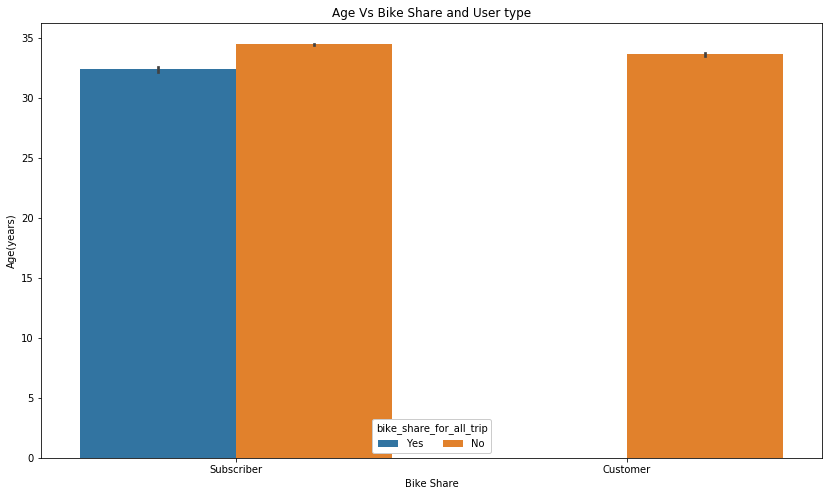

In [45]:
plt.figure(figsize=[14, 8])
ax = sb.barplot(data = df, x = 'user_type', y = 'age', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip')
x_y_t ('Bike Share', 'Age(years)', 'Age Vs Bike Share and User type')


Compared to customers, subscribers of younger age are major set of individuals that share their trip ride.

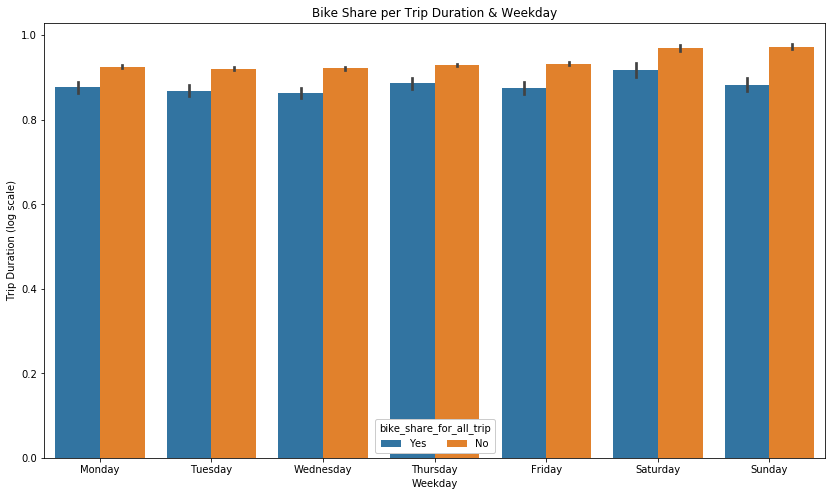

In [46]:
plt.figure(figsize = [14, 8])
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = sb.barplot(data = df, x = 'day', order = day_order, y = 'log_duration', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip')
x_y_t ('Weekday', 'Trip Duration (log scale)', 'Bike Share per Trip Duration & Weekday')

From this it is observed that those who share trip ride in allthe days of the week covers shorter distance than those who do not even though not much difference in distance.

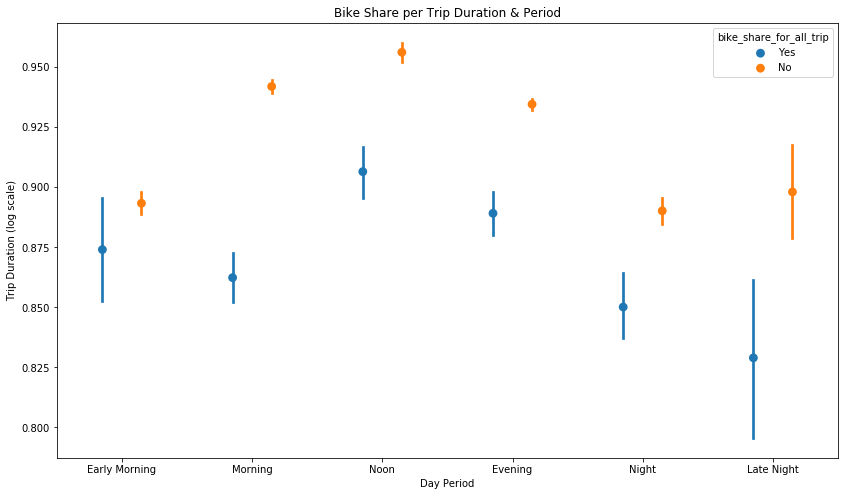

In [47]:
plt.figure(figsize = [14, 8])
day_order = ["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"]
ax = sb.pointplot(data = df, x = 'start_period', order = day_order, y = 'log_duration', hue = 'bike_share_for_all_trip',
                  dodge = 0.3, linestyles = "")
x_y_t ('Day Period', 'Trip Duration (log scale)', 'Bike Share per Trip Duration & Period')

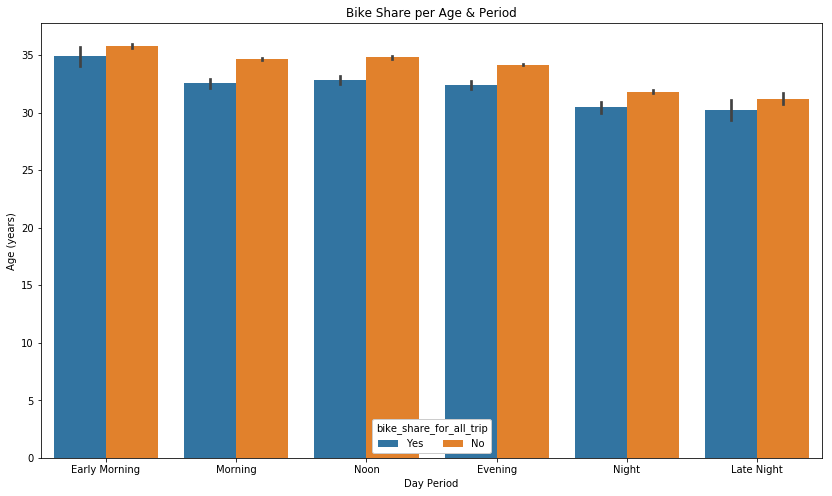

In [48]:
plt.figure(figsize = [14, 8])
day_order = ["Early Morning", "Morning", "Noon", "Evening", "Night", "Late Night"]
ax = sb.barplot(data = df, x = 'start_period', order = day_order, y = 'age', hue = 'bike_share_for_all_trip')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'bike_share_for_all_trip')
x_y_t ('Day Period', 'Age (years)', 'Bike Share per Age & Period')

While the average age of riders is 35years, it is observed that the younger riders in all the periods of the day tends to share their bike trips more that older individuals.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation to days of the week, age and trip share since tripduration seems to have not much correlation in the characteristics of the datasets.

### Were there any interesting or surprising interactions between features?

Looking back on the multivariate plots, it doesn't seem like there'smuch interaction between the trip duration and other trip characteristics. However we found out that age, user type and period ride take off are the highest determining factor of sharing trip.

## Conclusions

From the investigation in finding out factors to predict an individuals decision to share ride, our findings are;
Riders below the age of 35years tends to share their bike than riders older
Subscribers share their bike more than customers
Ride share are more frequent in the evening and noon than any other period of the day


